### Machine Learning -- NLP 

For the final phase of this project, NLP Machine Learning is performed. 
Due to the fact that the dataset provides patient reviews on specific drugs associated with related conditions and a 10-star patient rating reflecting overall patient satisfaction of the drug chosen for that specific condition, we choose Natural Language Processing Machine Learning techniques in predicting the rating for the reviews of the drugs for the first four most reviewed conditions of Birth Control, Depression, Pain and Anxiety. In the following cells, we import the needed libraries and then get our data set ready for the machine learning techniques we will choose. 



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import nltk
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math 
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
from bs4 import BeautifulSoup
import unicodedata
import nltk 
nltk.download('stopwords')
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm 
from scipy import stats 
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nazanin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\Nazanin\Downloads\drugsCom_raw\drugsComTest_raw.csv', sep="\t")
df1 = pd.read_csv(r'C:\Users\Nazanin\Downloads\drugsCom_raw\drugsComTrain_raw.csv', sep="\t")
#display(df, df1)

In [3]:
df2 = df.append(df1)
list(df2)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [4]:
df2 = df2.reset_index(drop=True)

In [5]:
print(df2.head())

   Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                                                                                                                                                                                    review  \
0  "I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed ...   
1  "My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been v... 

In [6]:
df2.drugName.value_counts()[:10]

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: drugName, dtype: int64

In [7]:
df2.condition.value_counts()[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Let's start by checking the Birth Control reviews and get a sense of the review feature for this condition in our data set. 

In [6]:
print(df2[df2['condition'] == 'Birth Control'].review.head())

4     "I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...
6     "I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t be...
9     "I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex dri...
30    "I absolutely love this product and recommend to everyone. I know everyone&#039;s body is different, so it is not for everyone, but it is not the medicines fault. I have NO negative symptoms since...
37    "I was on this for 5 years (and birth control pills for about 12 years), and would have told you how fabulous it was.  &lt;List all the benefits everyone else has listed,

In [7]:
print(df2[df2['condition'] == 'Anxiety'].review.head())

48                                                                                                                                                                                              "Works for me"
63     "I was prescribed this for onset of anxiety and possible hormonal mood swings. I was not told by my doctor how it would make me feel or how hard coming off of it would be. I took one 37.5 mg capsu...
83     "I did not like this medication. For anxiety, I have also tried Hydroxyzine (Atarax). I guess this is just my personal body chemistry but I actually prefer Atarax to this unlike most people. This ...
133    "I&#039;m a 32 year old male and I&#039;ve been taking buspar for about 10 months. At first it did nothing but make my anxiety worse. I would wake up with to full blown panic attacks and have the ...
208    "Klonopin is a very effective medicine for people such as myself that suffer from debilitating panic disorder and/or PTSD.  This medicine saved me from becoming inst

Before delving into the machine learning techniques, let's take a look at the bar plot of the review counts of ratings, rating from 1 to 10, and by the look of the following plot, we can see that the highly rated reviews as well as the low lated reviews have the highest review count compared to other rating counts for review. This shows that patients are motivated to rate a drug when either they like or dislike it very much. 

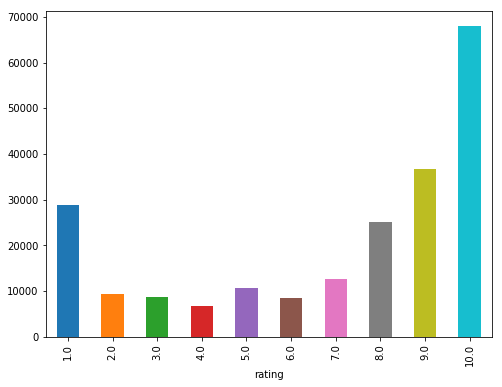

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('rating').review.count().plot.bar(ylim=0)
plt.show()

In [5]:
df2.review.count()

215063

In [6]:
df2[df2['condition'] == 'Birth Control'].review.count()

38436

In [7]:
print("The ration of the birth control review to the reviews of the entire data set: " + str(df2[df2['condition'] == 'Birth Control'].review.count()/df2.review.count()))

The ration of the birth control review to the reviews of the entire data set: 0.1787197239878547


### Review feature of the Data Set -- NLP 
+ On the Machine Learning phase, we start looking at the text documents of the review column. In order to do that, we need to do some text pre-processing. We process and tokenize corpus of reviews to build features for predictive models. Also, train machine learning models to predict drug rating based on reviews and relevant metadata.
+ In order to do that, we need to pre-process our text data by removing tags, i.e. HTML tags, as well as removing accented characters, é to e., special characters, which mainly add to the extra noise than giving benefits. We also need to stem the words as well as lemmatize in cases (stemming is cutting the word and keeping the root of the word and lemmatization is that the remaining root is grammatically a correct form but stem of the word is not). Another step in text pre-processing is to remove the Stop words. Stop words are the words with little and insignificance meaning in the corpus. Words such as a, an, the are examples of Stop words in English. Last but not least, we remove extra whitespaces, text lower casing as well as spelling corrections, grammatical error corrections, removing repeated characters to name a few. We then tokenize the corpus to build features for predictive models. 

#### Text pre-processing

+ Removing tags: Removing unnecessary HTML tags, etc. which do not add much value when analyzing text (The BeautifulSoup library does an excellent job in providing necessary functions for this.).

+ Removing accented characters: Removing  accented characters\letters in the text corpus and convert these characters and standardized into ASCII characters, an example is to convert é to e. 

+ Expanding contractions: Converting contraction to its expanded, original form often helps with text standardization, example of which would be, "do not" to "don’t" and "I would" to "I’d".

+ Removing special characters: Removing special characters and symbols often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.

+ Stemming and lemmatization: The reverse process of inflection is called stemming, which is basically obtaining the base form of a word. Lemmatization is very similar to stemming, the difference being that the root word from lemmatization is always a lexicographically correct word but the root stem may not be so.

+ Removing stopwords: Words with little or no significance in text corpus are known as stopwords, example of which are:  a, an, the. We can use a standard English language stopwords list from nltk and also add our own domain specific stopwords as needed.

+ Other text cleaning to do would be tokenization, removing extra whitespaces, text lower casing as well as spelling corrections, grammatical error corrections, removing repeated characters to name a few. 

In [8]:
# Let's remove special characters, extra whitespaces, digits, stopwords and lower casing the text corpus
#result = re.sub(pattern, repl, string, count=0, flags=0);
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)   ###plscheck this 
wpt = nltk.WordPunctTokenizer()  # $4.99 
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('</span> users found this comment helpful.') 
stop_words.append('&#039')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) 
    #re.I A means treats . as whatever it is. Performs case-insensitive matching. #issues with FLAGS!!!!!
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words] 
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]  
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)
# doc is the list of strings

We first attempt to analyze the rating of the reviews of the birth control drugs since birth control was the highest count for the condition in the data set with almost one fifth of the entire data set. Moreover, the number of reviews for birth control was the highest compared to the other conditions with the same ratio of 18%. 

In [9]:
norm_corpus = normalize_corpus(df2[df2['condition'] == 'Birth Control'].review)

In [7]:
norm_corpus

array(['birth control one cycl read review type similar birth control bit apprehens start im give birth control long enough far love birth control side effect minim like im even birth control experienc mild headach nausea ive feel great got period cue third day inact pill idea come zero pms period light bare cramp unprotect sex first month obvious didnt get pregnant im pleas high recommend',
       'ive copper coil month realli excit thought take hormon im good pain howev near faint insert couldnt beliv pain doctor say pain well month period last day im pain day random twang especi left side im consid whether want put intens pain heavi period id recommend somebodi doesnt alreadi heavi pain period right isnt',
       'pill almost two year work far get pregnant howev experi first didnt make huge differ month sex drive went along dri moodi increas drastic would cri one second get angri husband anyth everyth skin gotten lot wors broke place never last week yaz',
       ...,
       'experi 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In order to get more familiar with our birth control reviews, let us see what words are mostly used in that corpus. For this reason, we define a function to count the top "n" words in the corpus for us. 

In [11]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [9]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), n=40)  #None

[('period', 37273),
 ('month', 36515),
 ('pill', 26390),
 ('get', 23071),
 ('ive', 21923),
 ('day', 21659),
 ('im', 20430),
 ('year', 19498),
 ('control', 18934),
 ('week', 18639),
 ('birth', 18338),
 ('take', 18146),
 ('first', 17184),
 ('cramp', 16278),
 ('gain', 15381),
 ('weight', 15367),
 ('start', 15324),
 ('effect', 14001),
 ('got', 13875),
 ('time', 13647),
 ('pain', 13167),
 ('like', 13144),
 ('side', 12075),
 ('bleed', 11932),
 ('would', 11297),
 ('insert', 11113),
 ('feel', 10858),
 ('sinc', 10519),
 ('mood', 10392),
 ('acn', 10089),
 ('never', 9849),
 ('spot', 9770),
 ('sex', 9433),
 ('bad', 9376),
 ('go', 9145),
 ('use', 9100),
 ('also', 9021),
 ('one', 8951),
 ('last', 8476),
 ('dont', 8321)]

As we can see, words such as period, month, pill, etc. are among the highest count in the birth control corpus. 

In [12]:
common_words_BC = get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), 20)
for word, freq in common_words_BC:
    print(word, freq)

period 37273
month 36515
pill 26390
get 23071
ive 21923
day 21659
im 20430
year 19498
control 18934
week 18639
birth 18338
take 18146
first 17184
cramp 16278
gain 15381
weight 15367
start 15324
effect 14001
got 13875
time 13647


Utilizing CountVectorizer, we group the words in the corpus one by one or 2 by 2. This is called "n-gram". We start by 2-gram and we implement machine learning techniques to check the performance of the 2-gram and then compare it with 1-gram. 

In [9]:
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 


Transformed text vector is 
 [[5 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [2 0 0 ... 0 0 0]]
Words for each feature:
['birth control', 'feel like', 'first month', 'gain weight', 'mood swing', 'sex drive', 'side effect', 'take pill', 'weight gain']


In [11]:
x.shape

(38436, 9)

After getting the corpus ready for NLP Machine Learning techniques, we are now about to choose the proper techniques to be able to train the train set and be able to predict on the test set. Naive Bayes, Random Forest are among the most popular feature predicting models. 
The criteria on how to choose the proper machine learning technique is the performance and efficiency of the technique. In this project, we choose Naïve Bayes, Random Forest and Extreme Gradient Boosting techniques and we implement them on the rankings of the reviews of the four mostly reviewed and populated conditions in the data set, namely, Birth Control, Depression, Pain and Anxiety.

In [12]:
y = df2[df2['condition'] == 'Birth Control'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)
clf = MultinomialNB().fit(xtrain, ytrain)

In [13]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

In [14]:
print("MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest)))
print("Accuracy on training data: %0.2f" % (training_accuracy))
print("Accuracy on test data:     %0.2f" % (test_accuracy))   #30% is precicely predicting the ratings for df2_min = 0.1
# do a good and bad as a binary! 

MN Accuracy: 20.79%
Accuracy on training data: 0.21
Accuracy on test data:     0.21


Naive Bayes prediction turned out at a disappointing rate of only 21%! Let's switch to other models and see how they perform. 

In [19]:
 #regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)
#meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=clf_RF_predictions , classes= range(1,11))
#hash maps a value to another value and it's more efficient in computation
# normaization removing bias that could exists in a data set 
# correcting for the size of the corpus. one word review and the other is 200000 words 
# and contains the word good and we should 
# normaliztion in NLP is to use word frequecy. 

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
print(clf_RF.feature_importances_)

[0.20584546 0.06917504 0.0826262  0.08909746 0.15301874 0.08619107
 0.10124585 0.12122744 0.09157273]


In [23]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [25]:
#gridsearch and hyoerparameter tuning (on the TRAIN set) 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': None, 'n_estimators': 100}


In [29]:
results_22gram = clf_RF.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.2268 0.0033
{'max_features': 'auto', 'n_estimators': 200} 0.2258 0.003
{'max_features': 'auto', 'n_estimators': 300} 0.2267 0.0026
{'max_features': 'auto', 'n_estimators': 500} 0.2268 0.003
{'max_features': None, 'n_estimators': 100} 0.2269 0.0036
{'max_features': None, 'n_estimators': 200} 0.2259 0.0028
{'max_features': None, 'n_estimators': 300} 0.2266 0.0027
{'max_features': None, 'n_estimators': 500} 0.2268 0.0028
{'max_features': 'log2', 'n_estimators': 100} 0.2268 0.0033
{'max_features': 'log2', 'n_estimators': 200} 0.2258 0.003
{'max_features': 'log2', 'n_estimators': 300} 0.2267 0.0026
{'max_features': 'log2', 'n_estimators': 500} 0.2268 0.003


In [30]:
# The best hyperparameter performance occurs at: {'max_features': None, 'n_estimators': 100} 0.2269 0.0036

In [31]:
clf_RF = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [32]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[ 296   20   16    7    9    6   12   36   70  990]
 [ 145   23    7    6    8    4   11   30   45  464]
 [ 108   21   38    3    6    3    6   27   44  426]
 [ 100   11    3   14   11    6   12   29   30  297]
 [ 128   17    5    7   26    4    4   38   55  468]
 [  73   17    4    4    4   27    7   22   43  280]
 [  79    7    6    6    9    2   24   33   61  385]
 [ 144   17    6    7   14    6   17  123   63  651]
 [ 159   14   20    3   10    6   15   66  194  937]
 [ 169   29   10    3   10    7   17   75  125 1447]]
              precision    recall  f1-score   support

         1.0       0.21      0.20      0.21      1462
         2.0       0.13      0.03      0.05       743
         3.0       0.33      0.06      0.10       682
         4.0       0.23      0.03      0.05       513
         5.0       0.24      0.03      0.06       752
         6.0       0.38      0.06      0.10       481
         7.0       0.19      0.04      0.07       612
         8.0       0.26      0.12   

As we see, even Random Forest couldn't do much better than NB method so the next thing to do is to switch the (2,2) gram to (1,2) gram and see the performance of our models accordingly. 

In [33]:
from sklearn.datasets import make_classification
clf_RF.score(x, y, sample_weight=None)  # on the entire data here so obviously it goes up by a few percentages 

0.2560099906337808

Now, we are performing ngram(1,2): 

In [14]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 


Transformed text vector is 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
Words for each feature:
['absolut', 'acn', 'actual', 'ago', 'almost', 'also', 'alway', 'anoth', 'anxieti', 'anyth', 'around', 'away', 'back', 'bad', 'bc', 'best', 'better', 'birth', 'birth control', 'bit', 'bleed', 'bloat', 'bodi', 'break', 'breast', 'cant', 'caus', 'chang', 'clear', 'come', 'complet', 'constant', 'control', 'could', 'coupl', 'cramp', 'crazi', 'cri', 'day', 'decid', 'definit', 'depress', 'didnt', 'differ', 'doctor', 'dont', 'drive', 'due', 'eat', 'effect', 'emot', 'end', 'even', 'ever', 'everi', 'everyon', 'everyth', 'experi', 'experienc', 'extrem', 'face', 'far', 'feel', 'feel like', 'felt', 'fine', 'first', 'first month', 'gain', 'gain weight', 'get', 'give', 'go', 'good', 'got', 'gotten', 'great', 'half', 'happi', 'havent', 'headach', 'heavi', 'help', 'high', 'hope', 'hormon', 'horribl', 'hour', 'howev', 'hurt', 'im', 

In [15]:
x.shape

(38436, 199)

The default division percentage between train and test set is 25%, meaning that 25% of the data is held for test and 75% is being trained. 

In [16]:
y = df2[df2['condition'] == 'Birth Control'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [17]:
 #regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
print(clf_RF.feature_importances_)

[0.00269789 0.00767639 0.00260132 0.00460638 0.00539263 0.00721835
 0.00396282 0.00277185 0.0030831  0.0028311  0.00259909 0.0034435
 0.00613394 0.00701839 0.00310071 0.00410683 0.00340357 0.00829328
 0.00800549 0.00283173 0.0091929  0.0033075  0.00403647 0.00286612
 0.00452014 0.0037435  0.00425346 0.00512302 0.00330891 0.00303567
 0.00266628 0.00461462 0.00853098 0.00352482 0.00290925 0.00914174
 0.00306992 0.0034349  0.01083917 0.00292782 0.00284916 0.00775866
 0.00601178 0.00459086 0.0055754  0.00694947 0.00451654 0.00275842
 0.00289245 0.00698149 0.00382701 0.00260396 0.00467298 0.00447278
 0.00629426 0.00245419 0.00289067 0.0050974  0.00511957 0.00460053
 0.00289372 0.00628534 0.00769323 0.00272798 0.00442675 0.00282862
 0.00988772 0.00339204 0.00832815 0.00325487 0.01228586 0.00347653
 0.00707582 0.00562251 0.00875473 0.00308077 0.00573606 0.00273681
 0.00321603 0.00458847 0.00465476 0.00507328 0.0045402  0.0027949
 0.00387815 0.00364149 0.00585481 0.00266023 0.00499218 0.002997

In [20]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[1326   24   27    6    8    3    8   13   21   39]
 [  94  549   18    2    4    2    2    8   10   24]
 [  69   20  510    2   12    0    4    7   27   18]
 [  57    8   12  393   11    8    6   20   20   18]
 [  79   10   19    3  553    0   11   20   14   24]
 [  27    6    8   12   12  355    0   15   21   21]
 [  38    8    6    8   14    2  474   15   17   37]
 [  33   12   17   11    9    4    7  791   64   67]
 [  43   14   10    9   11    4   26   48 1144  131]
 [  69   16   10    7   21   12    6   48  133 1593]]
              precision    recall  f1-score   support

         1.0       0.72      0.90      0.80      1475
         2.0       0.82      0.77      0.80       713
         3.0       0.80      0.76      0.78       669
         4.0       0.87      0.71      0.78       553
         5.0       0.84      0.75      0.80       733
         6.0       0.91      0.74      0.82       477
         7.0       0.87      0.77      0.82       619
         8.0       0.80      0.78   

In [19]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


The following is the feature importance table corresponding to feature names:  

In [21]:
a = pd.DataFrame(data={'imp':clf_RF.feature_importances_,'vars':vectorizer.get_feature_names()})
a

,imp,vars
0,0.002698,absolut
1,0.007676,acn
2,0.002601,actual
3,0.004606,ago
4,0.005393,almost
5,0.007218,also
6,0.003963,alway
7,0.002772,anoth
8,0.003083,anxieti
9,0.002831,anyth


In [22]:
a.sort_values(by = 'imp' , ascending = False)

,imp,vars
130,0.015786,period
113,0.014690,month
108,0.014341,love
70,0.012286,get
90,0.011947,im
97,0.011823,ive
131,0.011631,pill
187,0.010844,week
38,0.010839,day
168,0.010339,take


The 80% is the prediction by Random Forest by its default hyper-parameters. We now fine tune the model with best parameters so we can see the change, hopefully an increase, in the prediction. 

In [40]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [42]:
results_12gram = clf_RF.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.2268 0.0033
{'max_features': 'auto', 'n_estimators': 200} 0.2258 0.003
{'max_features': 'auto', 'n_estimators': 300} 0.2267 0.0026
{'max_features': 'auto', 'n_estimators': 500} 0.2268 0.003
{'max_features': None, 'n_estimators': 100} 0.2269 0.0036
{'max_features': None, 'n_estimators': 200} 0.2259 0.0028
{'max_features': None, 'n_estimators': 300} 0.2266 0.0027
{'max_features': None, 'n_estimators': 500} 0.2268 0.0028
{'max_features': 'log2', 'n_estimators': 100} 0.2268 0.0033
{'max_features': 'log2', 'n_estimators': 200} 0.2258 0.003
{'max_features': 'log2', 'n_estimators': 300} 0.2267 0.0026
{'max_features': 'log2', 'n_estimators': 500} 0.2268 0.003


In [13]:
clf_RF = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [14]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[1331    0    2    0    0    0    0    6   16   74]
 [ 137  525    1    0    4    0    0    8   10   35]
 [ 118    4  493    0    4    0    0    0   12   31]
 [  75    0    3  384    2    0    0    4   29   45]
 [  70    0    6    0  557    2    0    8   28   58]
 [  47    0    2    0    0  328    0   13   17   39]
 [  43    0    0    0    2    0  483   11   43   47]
 [  52    2    4    0    0    0    0  790   77  127]
 [  59    2    2    0    0    0    0    7 1176  261]
 [  25    0    0    0    0    0    0    6   54 1808]]
              precision    recall  f1-score   support

         1.0       0.68      0.93      0.79      1429
         2.0       0.98      0.73      0.84       720
         3.0       0.96      0.74      0.84       662
         4.0       1.00      0.71      0.83       542
         5.0       0.98      0.76      0.86       729
         6.0       0.99      0.74      0.85       446
         7.0       1.00      0.77      0.87       629
         8.0       0.93      0.75   

Surpisingly and gladly the performance of Random Forest on the (1,2) gram was tremendously improved. Here, we see an 82% accuracy on the prediction on the actual rating of between 1 to 10 of a review, which is very impressive. 

In [15]:
from sklearn.datasets import make_classification
clf_RF.score(xtest, ytest, sample_weight=None) 

0.8195441773337496

## Checking outside the corpus review rating

In order to verify our machine learning performance, we choose a review from outside the entire data set so see the prediction of the review by our algorithm. 
The review we chose is: "i loved this birth control. i used to have so much bloating with my previous pills and this one is honestly the best. my sex drive is better and I don't have side effects of wieght gain." 
This review of the birth control review is a 10-star. Let's see what our machine predicts through Random Forest. 

In [23]:
normalize_corpus_outside = normalize_corpus(["i loved this birth control. i used to have so much bloating with my previous pills and this one is honestly the best. my sex drive is better and I don't have side effects of wieght gain."] ) 
# pre process, I do the count vectorizer, model.predict (on the verized form)

In [24]:
x = vectorizer.transform(normalize_corpus_outside)

In [25]:
clf_RF.predict(x)
print("The prediction on the rating for this review is: " + str(clf_RF.predict(x)))

The prediction on the rating for this review is: [10.]


In the following cells, we have normalized the corpus for other conditions, such as depression, pain and anxiety. We have followed all the steps that we did for the Birth Control and used Random Forest as our feature predicting model. 

#### Depression 

In [44]:
norm_corpus_D = normalize_corpus(df2[df2['condition'] == 'Depression'].review)

In [34]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Depression'].review), n=40)  #None

[('depress', 9308),
 ('take', 8613),
 ('feel', 8433),
 ('mg', 7995),
 ('day', 6832),
 ('effect', 6674),
 ('year', 5806),
 ('week', 5664),
 ('side', 5424),
 ('work', 5353),
 ('start', 5261),
 ('month', 4714),
 ('anxieti', 4674),
 ('im', 4345),
 ('like', 4249),
 ('help', 4242),
 ('medic', 3905),
 ('life', 3884),
 ('time', 3825),
 ('tri', 3736),
 ('ive', 3729),
 ('get', 3585),
 ('first', 3486),
 ('felt', 3143),
 ('better', 3143),
 ('sleep', 2807),
 ('go', 2745),
 ('doctor', 2734),
 ('medicin', 2708),
 ('back', 2593),
 ('much', 2483),
 ('would', 2421),
 ('also', 2418),
 ('one', 2203),
 ('realli', 2192),
 ('drug', 2190),
 ('good', 2128),
 ('dose', 2090),
 ('still', 2037),
 ('weight', 1999)]

In [45]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_D)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_D)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 


Transformed text vector is 
 [[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Words for each feature:
['abl', 'actual', 'ago', 'almost', 'also', 'alway', 'antidepress', 'anxieti', 'anyth', 'appetit', 'attack', 'away', 'back', 'bad', 'bed', 'best', 'better', 'cant', 'caus', 'celexa', 'chang', 'come', 'complet', 'could', 'couldnt', 'coupl', 'cri', 'cymbalta', 'day', 'depress', 'depress anxieti', 'didnt', 'differ', 'disord', 'doctor', 'dont', 'dose', 'drive', 'drug', 'due', 'eat', 'effect', 'effexor', 'energi', 'even', 'ever', 'everi', 'everyth', 'experi', 'experienc', 'extrem', 'far', 'feel', 'feel like', 'felt', 'final', 'first', 'first week', 'found', 'gain', 'gave', 'get', 'give', 'go', 'gone', 'good', 'got', 'great', 'happi', 'headach', 'help', 'high', 'hope', 'horribl', 'hour', 'howev', 'im', 'improv', 'increas', 'insomnia', 'issu', 'ive', 'know', 'last', 'less', 'lexapro', 'life', 'like', 'littl', 'long', 'lost

In [46]:
y = df2[df2['condition'] == 'Depression'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [47]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
print(clf_RF.feature_importances_)

[0.00403743 0.00293845 0.00584924 0.0043932  0.00726728 0.0037476
 0.0058153  0.0103228  0.0029234  0.00326871 0.00354678 0.00469821
 0.00707556 0.00591681 0.00247209 0.00372176 0.00802306 0.00377743
 0.00521608 0.0038862  0.00550516 0.0037061  0.00290006 0.00502601
 0.00365341 0.00319737 0.00378681 0.00458883 0.01356203 0.01266173
 0.00334667 0.0064951  0.00565808 0.00246259 0.00773281 0.00653911
 0.00732382 0.00351998 0.00826284 0.00356587 0.00332787 0.00981057
 0.00443697 0.00479073 0.00532518 0.00477784 0.0042282  0.00277781
 0.00441894 0.00505709 0.00514092 0.00411013 0.01590123 0.00470816
 0.00729207 0.00353696 0.00836153 0.00343788 0.00337364 0.00590171
 0.00287309 0.00949885 0.0036486  0.00836927 0.00295644 0.00701837
 0.00513867 0.00570425 0.00460049 0.00455335 0.01161411 0.00270649
 0.00471333 0.00422732 0.00349162 0.00473942 0.01123247 0.0044876
 0.00618887 0.00431485 0.00349838 0.00957047 0.00424598 0.00465496
 0.00477218 0.00593357 0.01279759 0.00973789 0.00515272 0.003300

In [49]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [50]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [51]:
clf_RF = RandomForestClassifier(n_estimators=200, max_features='log2', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [52]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[290   1   0   0   0   0   0   3  18  56]
 [ 17  81   0   0   0   0   1   4   4  27]
 [ 10   1  72   0   1   0   0   1   0  32]
 [  2   0   0  67   0   0   0   1  12  13]
 [  4   0   0   0  82   0   0   6   8  30]
 [  5   0   0   0   0  87   0   8   8  26]
 [  6   0   0   0   0   1 140  11  14  53]
 [  7   0   0   2   0   0   0 251  34 105]
 [  5   0   0   0   0   1   2   8 401 184]
 [ 11   0   0   0   1   1   0  16  31 778]]
              precision    recall  f1-score   support

         1.0       0.81      0.79      0.80       368
         2.0       0.98      0.60      0.75       134
         3.0       1.00      0.62      0.76       117
         4.0       0.97      0.71      0.82        95
         5.0       0.98      0.63      0.77       130
         6.0       0.97      0.65      0.78       134
         7.0       0.98      0.62      0.76       225
         8.0       0.81      0.63      0.71       399
         9.0       0.76      0.67      0.71       601
        10.0       0.60     

As we see, the prediction is at 74%, which is 8% lower than the prediction for reviews on the birth contrl. We need to note that the review count for Depression is less than a third, 0.32, of the review counts for birth control so the machine learning techniques won't have sufficient data to train and hence predict. 

In [13]:
df2[df2['condition'] == 'Depression'].review.count()

12164

Here, we attempt to tackle the prediction by using (2,2) gram but as we will see in the next few cells, the prediction rate is not as high as the (1,2) gram that we performed. 

In [54]:
# (2,2) gram
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=0.05, max_df=1.0, max_features=500)
# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_D)   #fit is enough and then vectorizer.transform(normalized_outside_corpus)
# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_D)
# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 
print()
print("Transformed text vector is \n", x)
# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 
y = df2[df2['condition'] == 'Depression'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)


Transformed text vector is 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Words for each feature:
['depress anxieti', 'feel like', 'first week', 'much better', 'side effect', 'start mg', 'start take', 'take mg', 'weight gain']


In [55]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
print(clf_RF.feature_importances_)

[0.09455699 0.12580011 0.09292928 0.07954719 0.15748121 0.09520075
 0.13021056 0.11401512 0.1102588 ]


In [57]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': None, 'n_estimators': 300}


In [59]:
clf_RF = RandomForestClassifier(n_estimators=300, max_features=None, random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [60]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[  5   0   0   0   0   0   3   3  22 324]
 [  0   2   0   0   0   2   2   3   9 125]
 [  0   0   2   1   0   0   0   6  10  92]
 [  2   0   1   1   0   0   0   5   8  72]
 [  0   0   0   1   6   0   0   6  17 118]
 [  3   0   0   0   0   3   1   8  13 127]
 [  3   0   0   0   1   1   8  11  20 172]
 [  0   0   1   0   1   0   1  33  47 312]
 [  5   1   5   0   1   0   1  21  85 463]
 [  5   2   2   1   3   1   2  32  90 707]]
              precision    recall  f1-score   support

         1.0       0.22      0.01      0.03       357
         2.0       0.40      0.01      0.03       143
         3.0       0.18      0.02      0.03       111
         4.0       0.25      0.01      0.02        89
         5.0       0.50      0.04      0.07       148
         6.0       0.43      0.02      0.04       155
         7.0       0.44      0.04      0.07       216
         8.0       0.26      0.08      0.13       395
         9.0       0.26      0.15      0.19       582
        10.0       0.28     

It's time for evaluating the prediction on reviews on pain. 

### Pain 

In [61]:
norm_corpus_P = normalize_corpus(df2[df2['condition'] == 'Pain'].review)

In [62]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Pain'].review), n=40)  #None

[('pain', 13862),
 ('take', 5484),
 ('work', 4136),
 ('day', 3902),
 ('mg', 3545),
 ('back', 2829),
 ('year', 2763),
 ('effect', 2486),
 ('help', 2341),
 ('time', 2181),
 ('medicin', 2140),
 ('doctor', 2102),
 ('medic', 1990),
 ('get', 1960),
 ('use', 1842),
 ('sever', 1804),
 ('side', 1801),
 ('hour', 1687),
 ('relief', 1557),
 ('tri', 1507),
 ('prescrib', 1507),
 ('feel', 1490),
 ('like', 1410),
 ('im', 1384),
 ('well', 1363),
 ('surgeri', 1316),
 ('ive', 1256),
 ('one', 1245),
 ('life', 1240),
 ('start', 1216),
 ('month', 1209),
 ('would', 1199),
 ('everi', 1171),
 ('also', 1147),
 ('patch', 1130),
 ('great', 1124),
 ('go', 1063),
 ('much', 1063),
 ('need', 1058),
 ('better', 1023)]

In [63]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_P)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_P)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 


Transformed text vector is 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 4]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]
Words for each feature:
['abl', 'ago', 'almost', 'also', 'away', 'back', 'back pain', 'bad', 'best', 'better', 'caus', 'chronic', 'chronic pain', 'could', 'daili', 'day', 'didnt', 'differ', 'disc', 'doctor', 'dont', 'dose', 'drug', 'due', 'effect', 'er', 'even', 'everi', 'feel', 'felt', 'first', 'found', 'gave', 'get', 'give', 'given', 'go', 'good', 'got', 'great', 'headach', 'help', 'hour', 'im', 'ive', 'knee', 'last', 'leg', 'life', 'like', 'littl', 'long', 'lot', 'lower', 'made', 'make', 'manag', 'mani', 'med', 'medic', 'medicin', 'mg', 'migrain', 'month', 'much', 'neck', 'need', 'nerv', 'never', 'night', 'norco', 'noth', 'one', 'oxycontin', 'pain', 'pain relief', 'patch', 'percocet', 'pill', 'prescrib', 'problem', 'put', 'realli', 'relief', 'reliev', 'say', 'seem', 'sever', 'side', 'side effect', 'sinc', 'sleep', 'start', 'still', 'st

In [64]:
y = df2[df2['condition'] == 'Pain'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [65]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
print(clf_RF.feature_importances_)

[0.00507205 0.00462299 0.00565628 0.00893089 0.00652562 0.01489724
 0.00703229 0.00728882 0.0065098  0.00914574 0.0070263  0.00687031
 0.00419252 0.00536318 0.00547727 0.0167282  0.00662916 0.0054591
 0.00761032 0.01218975 0.0097575  0.00781779 0.00843896 0.00676684
 0.01551271 0.00752545 0.00791305 0.00759387 0.01159906 0.00437626
 0.00819048 0.00639034 0.00616641 0.01327115 0.00702463 0.0083925
 0.00916835 0.00951327 0.00583812 0.01149034 0.00604197 0.01701391
 0.01266354 0.00929397 0.01067413 0.00582213 0.00806199 0.00540672
 0.00840218 0.01186835 0.00806511 0.00644472 0.00619722 0.0063577
 0.00661712 0.01046372 0.00500311 0.00594504 0.00537888 0.01479124
 0.01421884 0.01584166 0.00620655 0.00908773 0.00986737 0.00495396
 0.00861364 0.00592331 0.00578949 0.00685851 0.00593137 0.00736894
 0.00947436 0.00465462 0.03419348 0.00570851 0.00894881 0.00645307
 0.00622186 0.01121615 0.00573276 0.00625843 0.00821843 0.01172088
 0.00724977 0.00439848 0.00673739 0.01312556 0.01065716 0.0082915

In [67]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [68]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'log2', 'n_estimators': 300}


In [69]:
clf_RF = RandomForestClassifier(n_estimators=300, max_features='log2', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [70]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions)) 

[[115   2   0   0   0   1   4   2  12  58]
 [  0  33   0   0   0   0   2   5   5  14]
 [  3   0  25   0   0   0   0   2   6  14]
 [  2   0   0  31   0   0   0   1   4  11]
 [  2   0   0   1  41   0   0   0   3  19]
 [  2   0   0   0   0  28   2   1   3  25]
 [  5   0   0   0   0   0  63   6   8  42]
 [  5   0   0   2   0   0   0 178  31 103]
 [  4   0   2   0   1   2   1   9 262 162]
 [  4   2   0   1   3   2   2  13  30 640]]
              precision    recall  f1-score   support

         1.0       0.81      0.59      0.68       194
         2.0       0.89      0.56      0.69        59
         3.0       0.93      0.50      0.65        50
         4.0       0.89      0.63      0.74        49
         5.0       0.91      0.62      0.74        66
         6.0       0.85      0.46      0.60        61
         7.0       0.85      0.51      0.64       124
         8.0       0.82      0.56      0.66       319
         9.0       0.72      0.59      0.65       443
        10.0       0.59     

Prediction on the reviews on pain is even lower and we believe this is due to the fact that the model does not have sufficient amount of data to be able to predict. 

##### The following is a loop in which we can get predictions of all 4 conditions by utilizing Random Forest model. 

In [9]:
models = {}
accuracies = {}
list_of_conditions = ['Birth Control', 'Depression', 'Pain', 'Anxiety']
for condition in list_of_conditions:
    norm_corpus = normalize_corpus(df2[df2['condition'] == condition].review)
    print("Normalization complete: ")
    vectorizer_loop = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)
    #x = vectorizer(normalize_corpus)
    x = vectorizer_loop.fit_transform(norm_corpus)
    print("Vectorization complete: ")
    clf_RF_loop = RandomForestClassifier()
    #x = vectorizer.transform(normalize_corpus)
    y = df2[df2['condition']==condition]['rating']
    print("creating train test data: ")
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25) 4 objects are created and returend and we assign the 4 objects
    # left side is an object 
    print("Training model: ")
    model = clf_RF_loop.fit(xtrain,ytrain) #clf_RF.fit  train_model 
    models[condition]=model
    clf_RF_loop_predictions = clf_RF_loop.predict(xtest)
    accuracies[condition] =  confusion_matrix(ytest,clf_RF_loop_predictions)
    print("finished: " + condition)
    print(confusion_matrix(ytest,clf_RF_loop_predictions))  
    print(classification_report(ytest,clf_RF_loop_predictions))  
    print(accuracy_score(ytest, clf_RF_loop_predictions)) 



Normalization complete: 
Vectorization complete: 
creating train test data: 
Training model: 


C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Birth Control
[[1257   32   25   10   26    6    8   13    4   27]
 [  95  518   14    8    6    2    6   10    6   16]
 [  91   10  476    6   20    8    4    5   18   19]
 [  53    6    9  403    7    4    4   10    5   21]
 [  66    6   17   15  532    4    9   21   32   36]
 [  40    6   14    9   12  363    7   10   24   31]
 [  48    6    6    9    8    3  468   18   15   18]
 [  48   10    8    9   15    2   10  821   54   73]
 [  51   10   11    5    6   14   19   40 1165  170]
 [  75   13   17    8   18    4   17   43   95 1657]]
              precision    recall  f1-score   support

         1.0       0.69      0.89      0.78      1408
         2.0       0.84      0.76      0.80       681
         3.0       0.80      0.72      0.76       657
         4.0       0.84      0.77      0.80       522
         5.0       0.82      0.72      0.77       738
         6.0       0.89      0.70      0.78       516
         7.0       0.85      0.78      0.81       599
         8.0

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Depression
[[285   9   3   1   5   3   0  17  20  33]
 [ 18  86   2   2   0   4   5   1   9   7]
 [ 17   0  73   2   1   3   0   7  14  10]
 [ 10   1   0  52   3   0   3   2   5   5]
 [ 11   1   1   1  82   1   1   9  14   6]
 [ 10   0   0   0   0  83   0   8   7  18]
 [  7   0   4   4   0   2 144  10  29  21]
 [ 19   3   2   3   1   4  11 287  48  50]
 [ 33   5   6   3   0   3   9  33 408  81]
 [ 34   2   1   1   3   5  10  33  82 669]]
              precision    recall  f1-score   support

         1.0       0.64      0.76      0.70       376
         2.0       0.80      0.64      0.71       134
         3.0       0.79      0.57      0.67       127
         4.0       0.75      0.64      0.69        81
         5.0       0.86      0.65      0.74       127
         6.0       0.77      0.66      0.71       126
         7.0       0.79      0.65      0.71       221
         8.0       0.71      0.67      0.69       428
         9.0       0.64      0.70      0.67       581
       

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Pain
[[121   4   1   1   1   1   3  11  11  31]
 [  2  32   0   0   0   0   2   4  10  12]
 [  6   1  30   0   0   0   0   7   1   8]
 [  5   2   0  20   1   0   0   4   5   7]
 [  4   0   0   0  31   1   1   3   4  15]
 [  6   0   0   0   0  31   1   6   4  10]
 [  2   2   0   0   3   1  66  14  11  19]
 [ 12   3   1   0   1   3  10 187  39  49]
 [ 10   0   1   1   2   2   8  34 288  96]
 [ 30   2   2   0   1   1  13  43  88 556]]
              precision    recall  f1-score   support

         1.0       0.61      0.65      0.63       185
         2.0       0.70      0.52      0.59        62
         3.0       0.86      0.57      0.68        53
         4.0       0.91      0.45      0.61        44
         5.0       0.78      0.53      0.63        59
         6.0       0.78      0.53      0.63        58
         7.0       0.63      0.56      0.59       118
         8.0       0.60      0.61      0.61       305
         9.0       0.62      0.65      0.64       442
        10.0 

C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Anxiety
[[126   4   0   0   1   4   0  10  12  30]
 [  6  31   1   0   2   0   0   0   4   6]
 [  6   1  24   0   0   0   0   6   9   9]
 [  4   2   0  19   2   2   0   4  13   9]
 [  3   0   0   0  26   0   1   8   7  17]
 [  3   0   0   0   0  25   0   2   3  10]
 [  5   0   0   0   0   0  66   5   8  21]
 [ 16   1   1   1   1   0   2 151  31  57]
 [ 16   1   2   0   2   1   2  24 231 107]
 [ 12   3   2   1   0   2   3  39  66 621]]
              precision    recall  f1-score   support

         1.0       0.64      0.67      0.66       187
         2.0       0.72      0.62      0.67        50
         3.0       0.80      0.44      0.56        55
         4.0       0.90      0.35      0.50        55
         5.0       0.76      0.42      0.54        62
         6.0       0.74      0.58      0.65        43
         7.0       0.89      0.63      0.74       105
         8.0       0.61      0.58      0.59       261
         9.0       0.60      0.60      0.60       386
        10

#### Extreme Gradient Boosted Model with tuned hyperparameters

##### Why Use XGBoost?
In this section, we attempt to use another predicting model, called XGBoost to see if it's worth it (time and memory-wise as well as predicting power-wise). 
The two reasons to use XGBoost are also the two goals of the project:

+ Execution Speed.
+ Model Performance.


In [26]:
!pip install xgboost

In [27]:
import os

mingw_path = r'C:\mingw-w64\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [28]:
clf_xgb = xgb.XGBClassifier(seed=42)
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [29]:
clf_xgb_predictions = clf_xgb.predict(xtest)
print(clf_xgb_predictions)

[ 9. 10. 10. ...  1.  1. 10.]


In [32]:
pred_xgb = clf_xgb.predict_proba(xtest)
pred_xgb

array([[0.08585033, 0.07299387, 0.07060201, ..., 0.11585876, 0.20801324,
        0.08751033],
       [0.0871696 , 0.05253462, 0.04884918, ..., 0.10958034, 0.19170658,
        0.2445443 ],
       [0.07005567, 0.03702347, 0.03938122, ..., 0.1725004 , 0.20429568,
        0.23365495],
       ...,
       [0.38858914, 0.0945024 , 0.07692696, ..., 0.06481455, 0.08719738,
        0.0855424 ],
       [0.25477156, 0.16465004, 0.12848762, ..., 0.05594369, 0.04289082,
        0.03272218],
       [0.0521051 , 0.02895203, 0.01790675, ..., 0.09202512, 0.25231206,
        0.46827883]], dtype=float32)

In [33]:
clf_xgb.score(xtest, ytest)

0.3392652721407014

The result from Extreme Gradient Boosting has been a bit disappointing to say the least! However, we are glad that we gave that model a try to see its performance.  

### Conclusion and Closing Remarks 


We used the data set given by drugs.com and aimed to predict rating on reviews on reviews of various conditions in the data set. On the wrangling and visualization of the data, we listed the first 10 drug categories and also the top 10 conditions presented in the data set. We then plotted the histogram of the review counts and we found out that the review feature is bi-modal (heavy count on the higher review score of 9 and 10 as well as lower review score of 1). The histogram of the logarithm of useful counts of a review (number of people who found a review useful) turned out to be normally distributed. 
Throughout the visualization process, we plotted the bar charts of the drug names as well as that of the conditions of the drugs. Moreover, we plotted the first 10 most used Birth Control drugs since the condition of Birth Control was the highest condition name for the drug use, followed by Depression, Pain and Anxiety. On the statistical inference phase, we tested the original test and train sets on the condition of birth control, depression, pain and anxiety to see the proportions of these conditions in the two data sets they were split into.  We also tested the mean of the drug rating of the entire data set as well as train and test data sets and saw that there was no difference in any of the ratios in any of the sets, hence, we failed to reject the null hypothesis. Basically, it turned out that all the conditions were evenly distributed and the means of the entire data set as well as the train and test data sets are also the same. Hence, we failed to reject the null hypothesis based on the fact that the mean drug review rating for the total data set and test sets is the same. On the Machine Learning phase, we started looking at the text documents of the review column for the top four conditions. We processed and tokenized corpus of reviews to build features for predictive models and trained machine learning models to predict drug rating based on reviews and relevant metadata. The machine learning models we chose were Naive Bayes, Random Forest and Extreme Gradient Boosting and the best performance by far was by Random Forest with a predicting score as high as 82%. 